In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

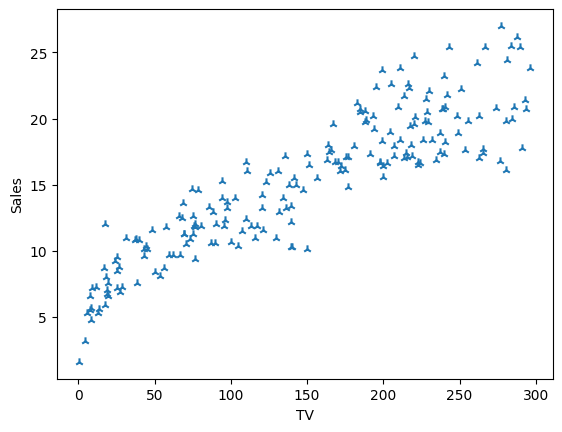

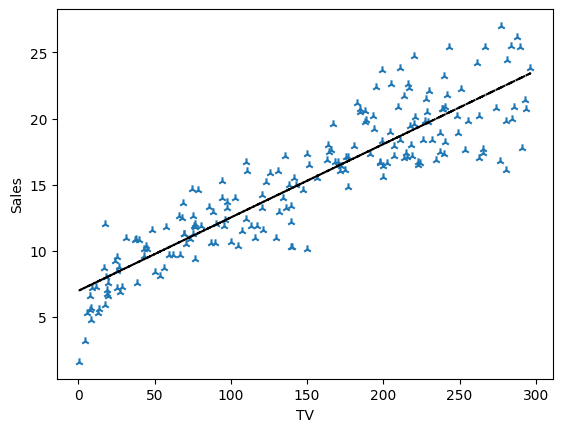

In [2]:
#Exercise 5.01 Predicting Sales From Advertising Spend Using Linear Regression

#Load in the dataset 
advertising = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter05/Datasets/advertising.csv')
advertising.head()

#Visualize the association between TV and Sales 
plt.scatter(advertising.TV,
            advertising.Sales,
            marker = '2')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

#Use linear regression to fit to Sales and TV
lr.fit(advertising[['TV']], 
       advertising[['Sales']])

#Predict method to create sale pred variable
sales_pred = lr.predict(advertising[['TV']])

#Plot the predicted sales as a line over Sales v. TV 
plt.plot(advertising.TV,
         sales_pred,
         'k--')
plt.scatter(advertising.TV,
            advertising.Sales,
            marker = '2')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [3]:
# Exercise 5.02 Creating Features for Customer Revenue Prediction

#Load in dataset
df = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter05/Datasets/azra_retail_transactions.csv')
df.head()

#Convert invoice date to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Calc the revenue for each row
df['revenue'] = df['UnitPrice'] * df['Quantity']

#Perform groupby on invoiceNo
operations = {'revenue':'sum',
              'InvoiceDate':'first',
              'CustomerID':'first'}

df = df.groupby('InvoiceNo').agg(operations)

#Create a column for year
df['year'] = df['InvoiceDate'].dt.year

#Calc how many days since last purchase
df['days_since'] = (dt.datetime(year = 2019, 
                                month = 12,
                                day = 31,
                                ) - df["InvoiceDate"]).apply(lambda x: x.days)

#Create the feature for days since the first and last purchase
operations = {'revenue' : 'sum',
              'days_since' : ['max', 'min', 'nunique']}
X = df[df['year'] == 2019].groupby('CustomerID').agg(operations)

#To simplify reset the names to make them easier to understand
X.columns = [' '.join(col).strip() for col in X.columns.values]

#Derive average spend per order
X['avg_order_cost'] = X['revenue sum'] / X['days_since nunique']

#Creating outcome that will be predicted
y = df[df['year'] == 2020].groupby('CustomerID')['revenue'].sum()

#Put all predictors and outcomes into a single DF
wrangled_df = pd.concat([X,y],
                        axis = 1)

wrangled_df.columns =['revenue_2019',
                      'days_since_first_purchase',
                      'days_since_last_purchase',
                      'number_of_purchases',
                      'avg_order_cost',
                      'revenue_2020']

#Drop customers without values
wrangled_df = wrangled_df[~wrangled_df.revenue_2019.isnull()]
wrangled_df = wrangled_df[~wrangled_df.revenue_2020.isnull()]

#Remove outliers
wrangled_df = wrangled_df[wrangled_df.revenue_2020 < ((wrangled_df.revenue_2020.median())
                                                      + wrangled_df.revenue_2020.std()*3)]

wrangled_df = wrangled_df[wrangled_df.revenue_2019 < ((wrangled_df.revenue_2019.median())
                                                      + wrangled_df.revenue_2019.std()*3)]

wrangled_df.head()




,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


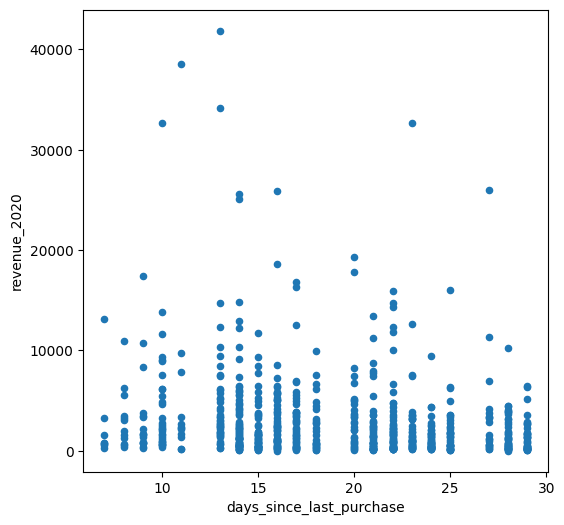

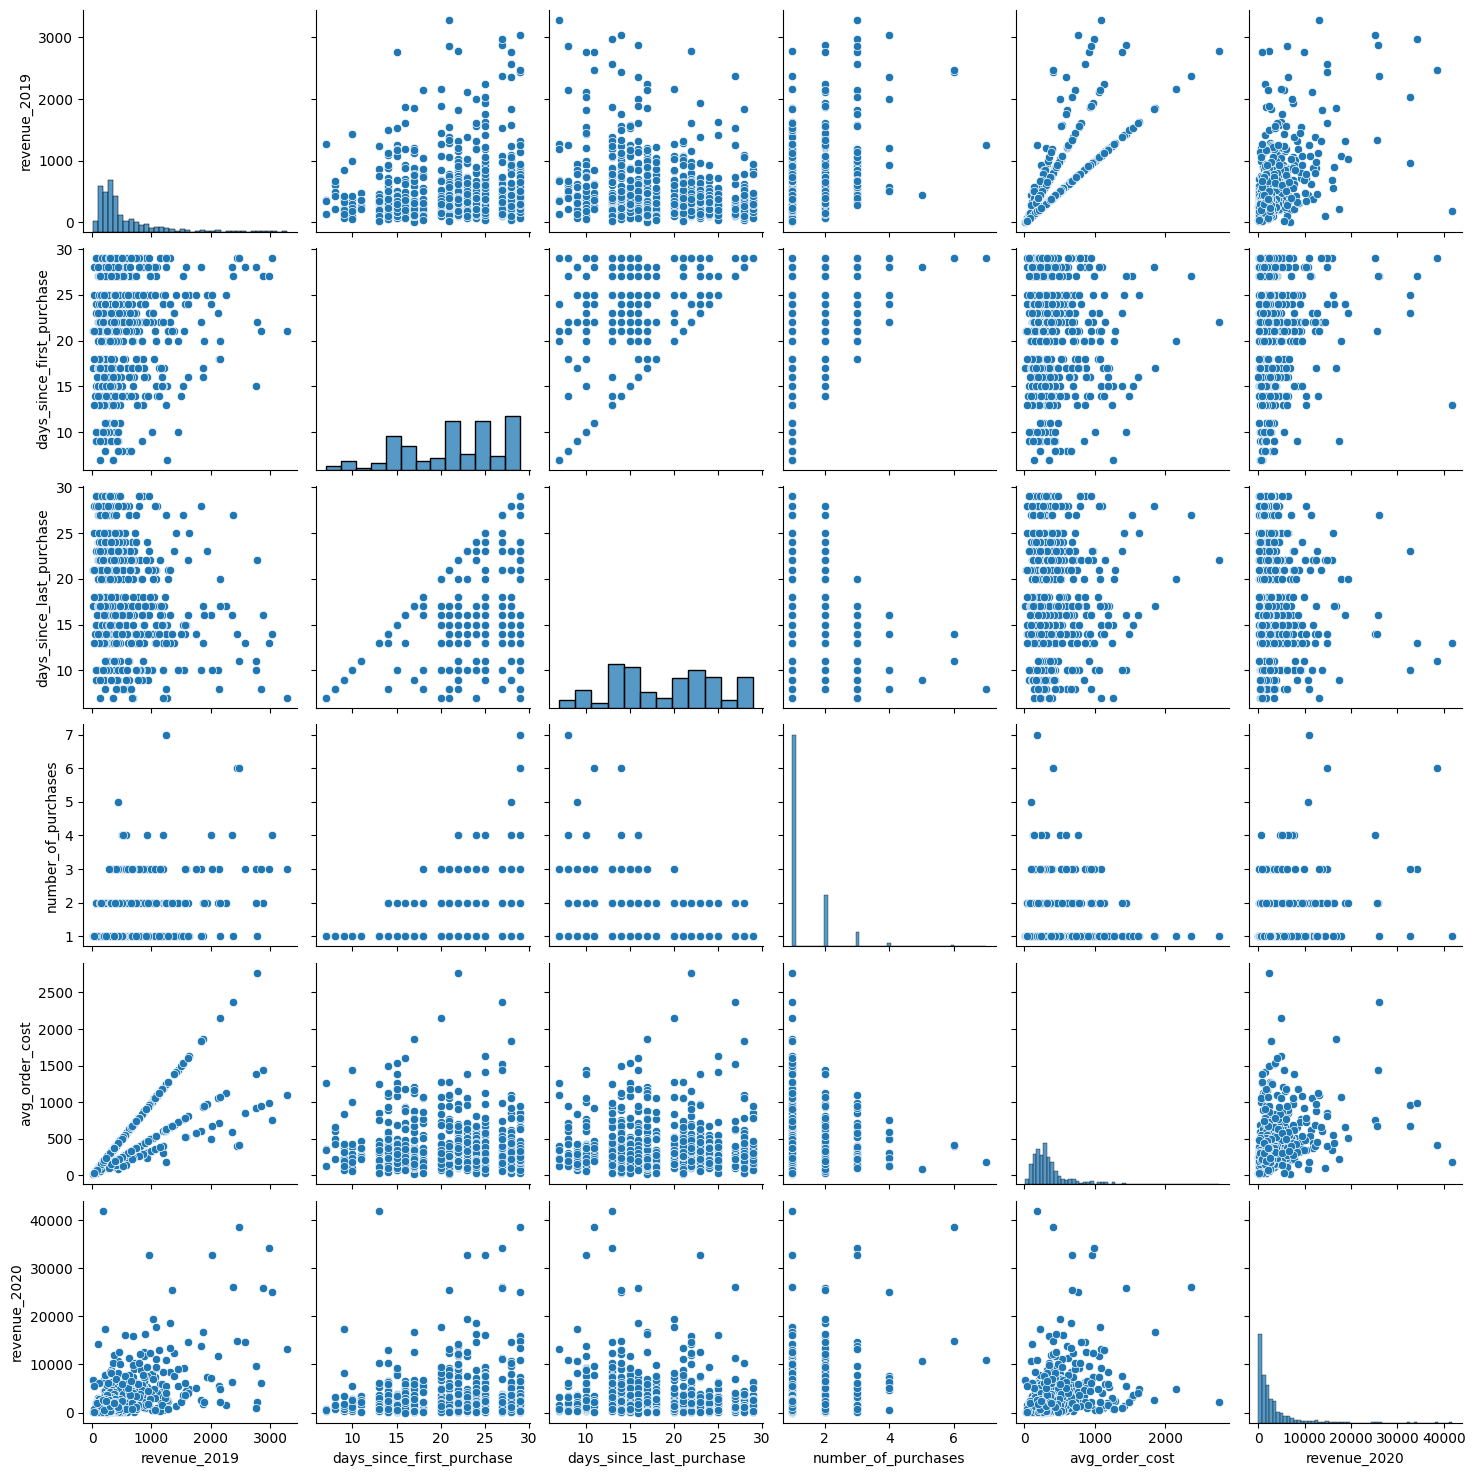

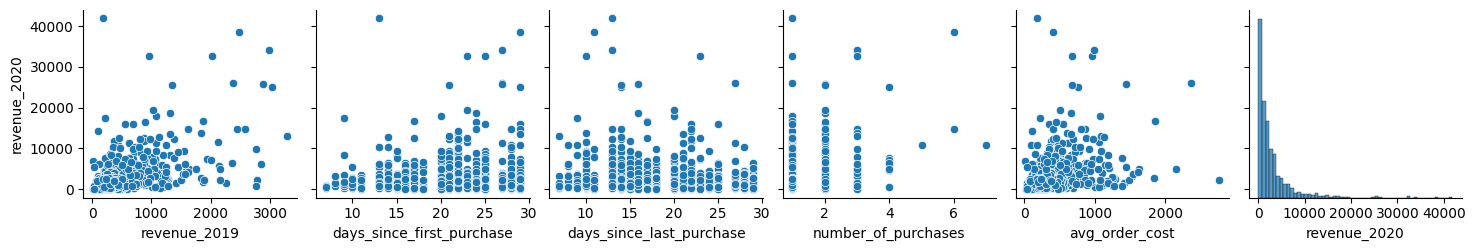

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


In [7]:
#Exercise 5.03 Examining Relationships Between Predictors and the Outcome

#Use the wrangled_df from previous exercise
df = wrangled_df.copy()

#Use plot method to make a scatterplot
df.plot.scatter(x = 'days_since_last_purchase',
                y = 'revenue_2020',
                figsize = [6,6])
plt.show()

#Create a pairplot
sns.pairplot(df)
plt.show()

#Using pairplot with yvar parameter
sns.pairplot(df, x_vars = df.columns, y_vars = 'revenue_2020')
plt.show()

#Use the corr method
df.corr()

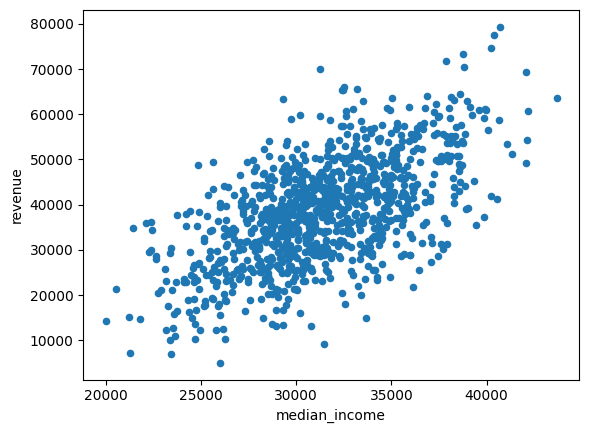

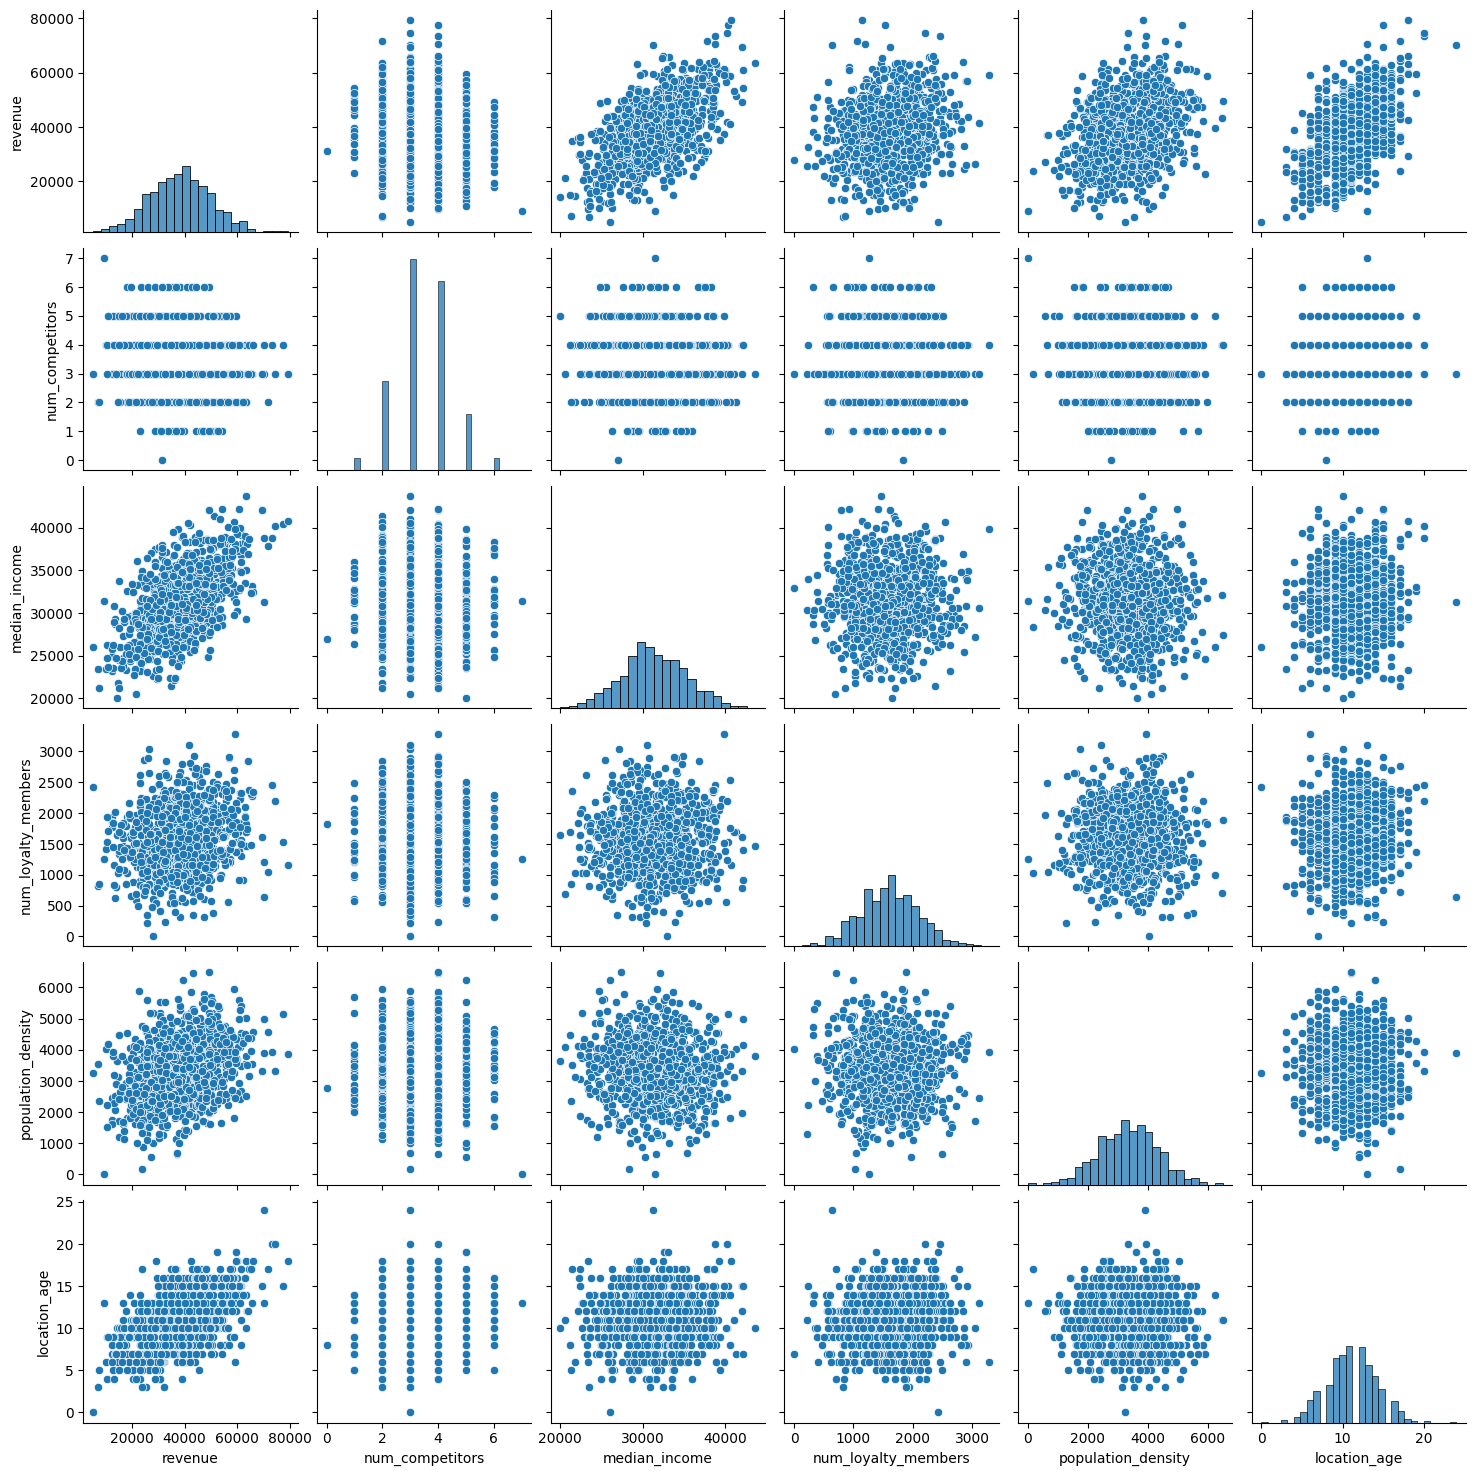

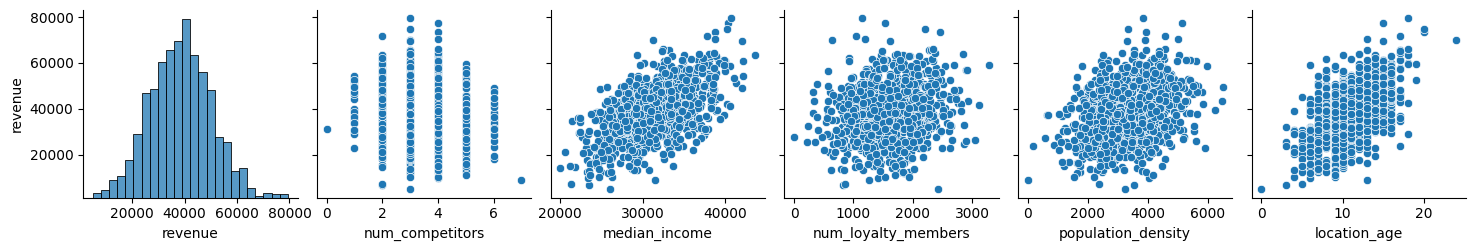

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


In [16]:
# Activity 5.01 - Examining the Realtionship Between Store Location and Revenue

#Load in data and check it
df = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter05/Datasets/location_rev.csv')
df.head()

#Creating a scatterplot of median_income and store revenue
df.plot.scatter(x = 'median_income',
                y = 'revenue')
plt.show()

#Create pairplot to show relationships
sns.pairplot(df)
plt.show()

#Look at revenue variable
sns.pairplot(df,
             x_vars = df.columns,
             y_vars = 'revenue')
plt.show()

#Look at correlations
df.corr()


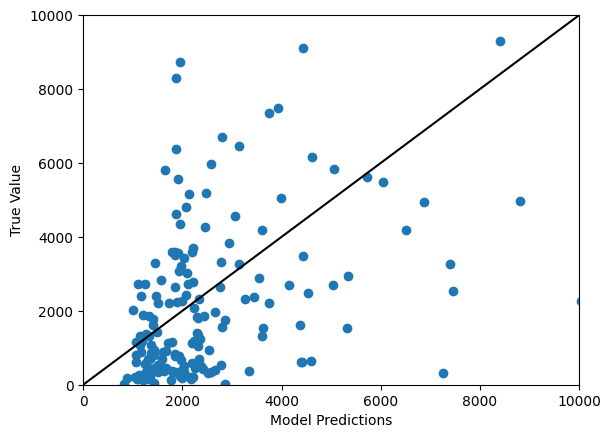

array([[1.        , 0.61257401],
       [0.61257401, 1.        ]])

In [29]:
#Exercise 5.04 - Building a Linear Model Predicting Customer Spend

#Load in dataset 
df = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter05/Datasets/wrangled_transactions.csv',
                 index_col = 'CustomerID')
#Look at corr data
df.corr()

#Store the ind. and dep. variables 
X = df[['revenue_2019',
        'days_since_last_purchase',
        'number_of_purchases',
        'avg_order_cost']]

y = df['revenue_2020']

from sklearn.model_selection import train_test_split
#use train test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 100)

#create a LinearRegression Model and fit on training data 
model = LinearRegression()
model.fit(X_train, y_train)

#Look at model coef 
model.coef_

#Look at model intercept
model.intercept_

#Look at a prediction of single customer
single_customer = pd.DataFrame({'revenue_2019': [1000],
                                'days_since_last_purchase':[20],
                                'number_of_purchases': [2],
                                'avg_order_cost': [500]})
model.predict(single_customer)

#Plot models predictions
plt.scatter(model.predict(X_test), 
            y_test)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0,10000], [0,10000], 'k-')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

#Examine relationship further 
np.corrcoef(model.predict(X_test),
            y_test)                                                                                                                                                                     

C:\Users\Kyle\AppData\Local\Temp\ipykernel_2412\66473184.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 100000], [0, 100000], 'k-', color = 'gray')


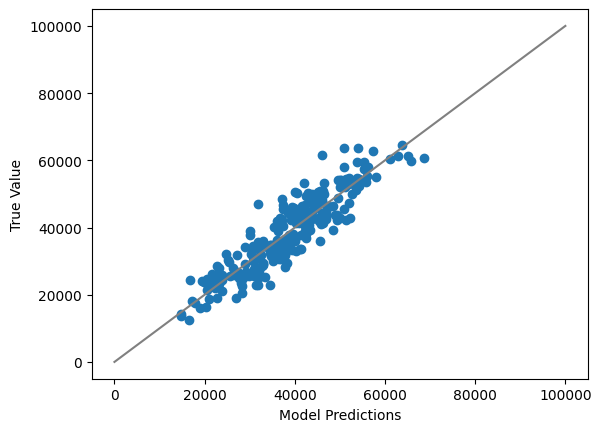

array([[1.        , 0.90615978],
       [0.90615978, 1.        ]])

In [44]:
#Activity 5.02 Predicting Store Revenue Using Linear Regression

#Load in data 
df = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter05/Datasets/location_rev.csv')
df.head()

#Create X and y varaibles

X = df[['num_competitors',
        'median_income',
        'num_loyalty_members',
        'population_density',
        'location_age']]

y = df['revenue']

#Split into train test data 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100)

model = LinearRegression()
model.fit(X_train, y_train)

#model coefficients
model.coef_

#model intercept
model.intercept_

#Produce a prediction
single_prediction = pd.DataFrame({'num_competitors': [3],
                                'median_income' : [30000],
                                'num_loyalty_members' : [1200],
                                'population_density' : [2000],
                                'location_age' : [10]})
model.predict(single_prediction)

#Plot
plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], 'k-', color = 'gray')
plt.show()

#See fit
np.corrcoef(model.predict(X_test), y_test)